In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('disease.csv')
test_data  = pd.read_csv('unseen_data.csv')
sample = pd.read_csv('sample_solution.csv')

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


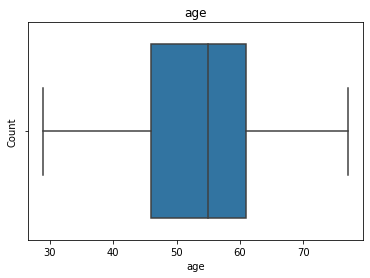

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


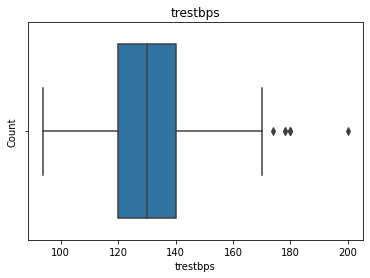

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


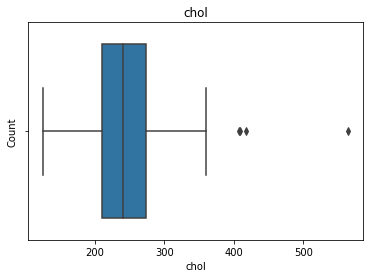

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


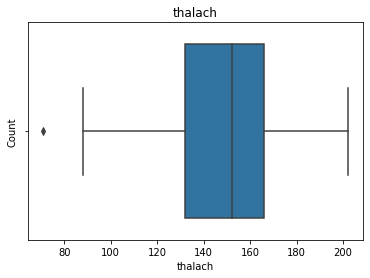

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


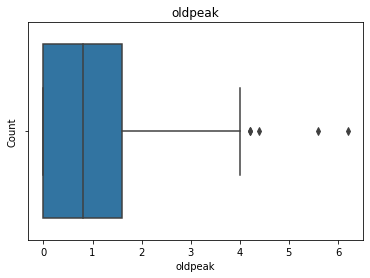

In [2]:
numeric_cols = [f for f in train_data.columns if train_data[f].dtypes != 'O']
discrete_cols = [f for f in numeric_cols if len(train_data[f].unique())< 10]
continuos_cols = [f for f in numeric_cols if f not in discrete_cols]

############# checking for outliers in continous features ##############
############### Continous Nuerical Features ################################
for feature in continuos_cols:
    data=train_data.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

<AxesSubplot:>

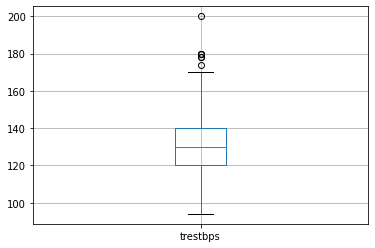

In [3]:
train_data.boxplot(column="trestbps")

<AxesSubplot:>

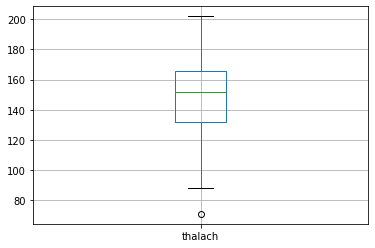

In [4]:
train_data.boxplot(column="thalach")

<AxesSubplot:>

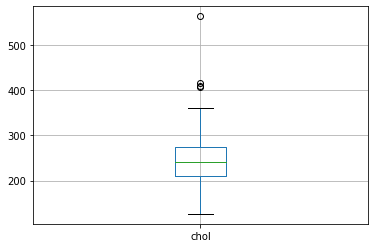

In [5]:
train_data.boxplot(column="chol")

<AxesSubplot:>

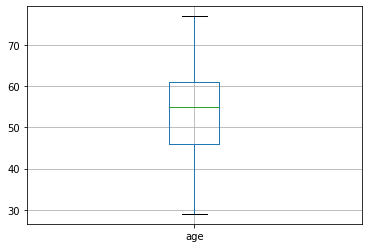

In [6]:
train_data.boxplot(column="age")        #### no outlier

<AxesSubplot:>

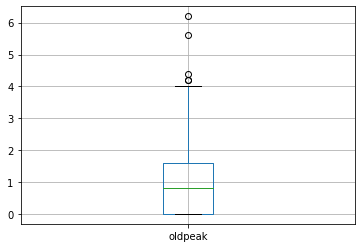

In [7]:
train_data.boxplot(column="oldpeak")

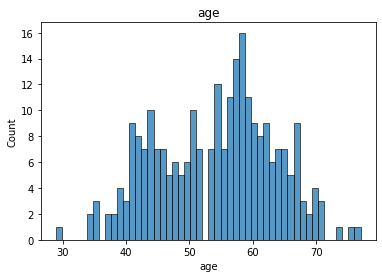

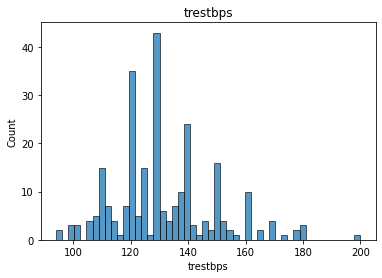

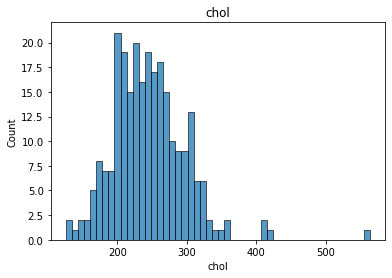

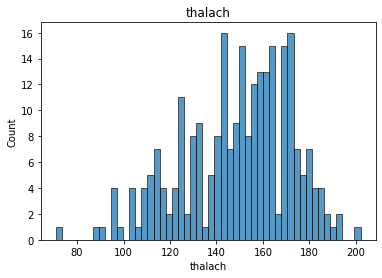

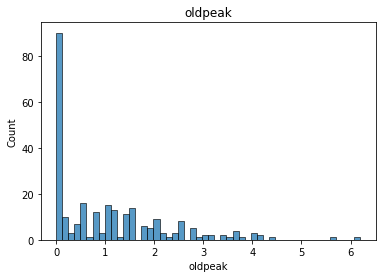

In [8]:
for feature in continuos_cols:
    data=train_data.copy()
    sns.histplot(data[feature],bins=50)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [9]:
train_data['trestbps'].describe()

count    257.000000
mean     131.428016
std       17.589161
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [45]:
############ trestbps ############# --normally distributed
lower_boundry = train_data['trestbps'].mean() - 1.5*train_data['trestbps'].std()
upper_boundry = train_data['trestbps'].mean() + 1.5*train_data['trestbps'].std()
print(lower_boundry),print(upper_boundry)

105.30703285731278
157.42448465241483


(None, None)

In [46]:
train_data.loc[train_data['trestbps'] >= 157,'trestbps'] = 157

In [37]:
############ trestbps ############# --normally distributed
lower_boundry = train_data['chol'].mean() - 1.5*train_data['chol'].std()
upper_boundry = train_data['chol'].mean() + 1.5*train_data['chol'].std()
print(lower_boundry),print(upper_boundry)

171.24306847812528
318.11101712498754


(None, None)

In [13]:
train_data['chol'].describe()

count    257.000000
mean     245.412451
std       52.269744
min      126.000000
25%      210.000000
50%      240.000000
75%      274.000000
max      564.000000
Name: chol, dtype: float64

In [38]:
train_data.loc[train_data['chol'] >= 318,'chol'] = 318

In [41]:
############ trestbps ############# --normally distributed
lower_boundry = train_data['thalach'].mean() - 1.5*train_data['thalach'].std()
upper_boundry = train_data['thalach'].mean() + 1.5*train_data['thalach'].std()
print(lower_boundry),print(upper_boundry)

113.90511530972209
184.1804878031184


(None, None)

In [17]:
train_data['thalach'].describe()

count    257.000000
mean     149.015564
std       23.511960
min       71.000000
25%      132.000000
50%      152.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [42]:
train_data.loc[train_data['thalach'] <= 113,'thalach']  = 113

In [23]:
############ oldpeak ############# --rightly skewed distributed
#### Lets compute the Interquantile range to calculate the boundaries
IQR=train_data['oldpeak'].quantile(0.75)-train_data['oldpeak'].quantile(0.25)

In [24]:
IQR

1.6

In [27]:
lower_bridge=train_data['oldpeak'].quantile(0.25)-(IQR*1.5)
upper_bridge=train_data['oldpeak'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-2.4000000000000004
4.0


(None, None)

In [28]:
train_data['oldpeak'].describe()

count    257.000000
mean       1.040856
std        1.178023
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [29]:
train_data.loc[train_data['oldpeak'] > 4,'oldpeak']  = 4

In [49]:
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,57,1,0,150,276,0,0,113,1,0.6,1,1,1,0
1,57,0,0,120,318,0,1,163,1,0.6,2,0,2,1
2,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
3,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
4,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


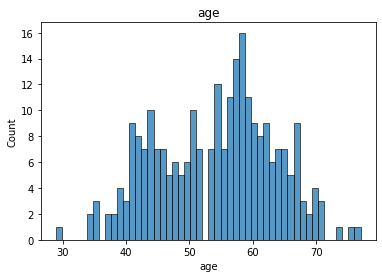

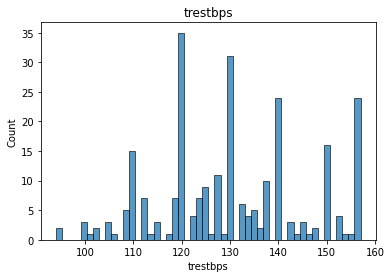

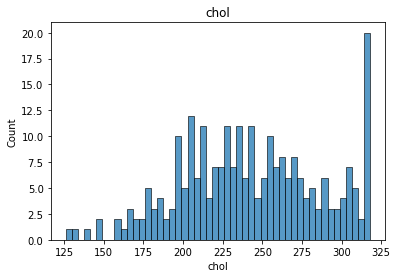

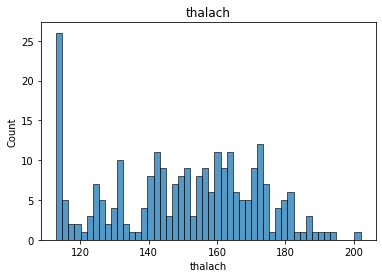

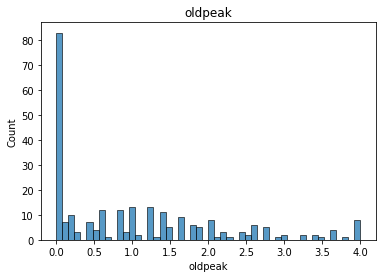

In [47]:
for feature in continuos_cols:
    data=train_data.copy()
    sns.histplot(data[feature],bins=50)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


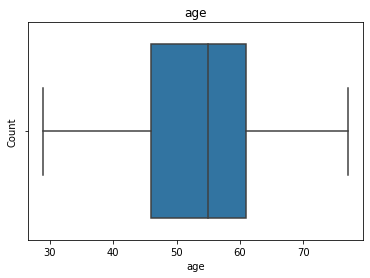

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


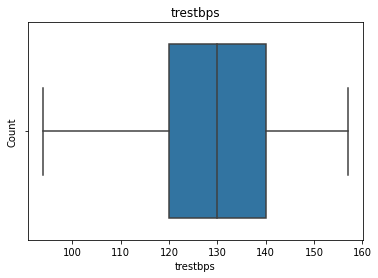

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


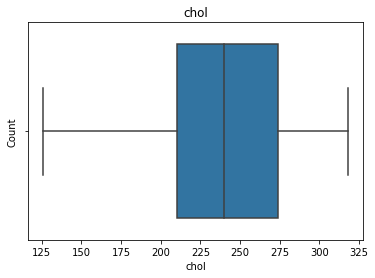

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


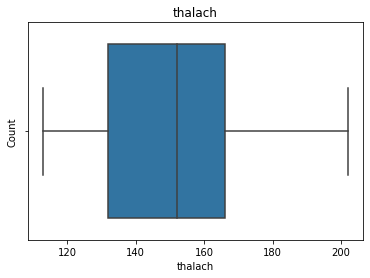

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


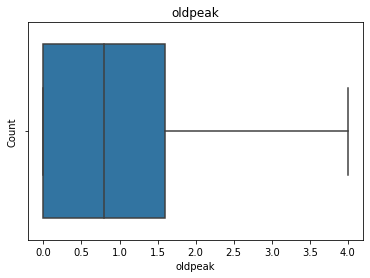

In [48]:
############### Continous Nuerical Features ################################
for feature in continuos_cols:
    data=train_data.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [50]:
X = train_data.drop(['disease'],axis=1)
y = train_data['disease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled,y_train)
y_pred = lr_clf.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80        37
           1       0.78      0.95      0.86        41

    accuracy                           0.83        78
   macro avg       0.85      0.83      0.83        78
weighted avg       0.85      0.83      0.83        78

[[26 11]
 [ 2 39]]
accuracy is:  0.8333333333333334


In [51]:
############# Decision Tree Classifier ###################
X = train_data.drop(['disease'],axis=1)
y = train_data['disease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
ex_decision = DecisionTreeClassifier()
ex_decision.fit(X_train_scaled,y_train)
y_pred_dt = ex_decision.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_dt))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        36
           1       0.83      0.83      0.83        42

    accuracy                           0.82        78
   macro avg       0.82      0.82      0.82        78
weighted avg       0.82      0.82      0.82        78

[[29  7]
 [ 7 35]]
accuracy is:  0.8205128205128205


In [52]:
############# XGB  Classifier ###################
X = train_data.drop(['disease'],axis=1)
y = train_data['disease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

import xgboost as xgb
xg_decision = xgb.XGBClassifier()
xg_decision.fit(X_train_scaled,y_train)
y_pred_xg = xg_decision.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xg))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_xg))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred_xg))

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.87      0.92      0.89        37

    accuracy                           0.90        78
   macro avg       0.90      0.90      0.90        78
weighted avg       0.90      0.90      0.90        78

[[36  5]
 [ 3 34]]
accuracy is:  0.8974358974358975


In [67]:
X = train_data.drop(['disease'],axis=1)
y = train_data['disease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

from sklearn.model_selection import RandomizedSearchCV

################# hyper parameter tuning #####################
clf_xgb = xgb.XGBClassifier()
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

clf_random = RandomizedSearchCV(clf_xgb, param_distributions = params, n_iter = 25,scoring='roc_auc',cv= 3, verbose = 3, n_jobs = -1)

clf_random.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [68]:
clf_random.best_params_

{'subsample': 0.6,
 'min_child_weight': 1,
 'max_depth': 5,
 'gamma': 1,
 'colsample_bytree': 1.0}

In [69]:
clf_xgb_best = xgb.XGBClassifier(subsample = 0.6,
 min_child_weight =  1,
 max_depth = 5,
 gamma = 2,
 colsample_bytree = 1.0)

clf_xgb_best.fit(X_train_scaled,y_train)
y_pred_xg_best = clf_xgb_best.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xg_best))

from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_xg_best))

from sklearn.metrics import accuracy_score
print("accuracy is: " ,accuracy_score(y_test,y_pred_xg_best))

[18:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        39
           1       0.80      0.92      0.86        39

    accuracy                           0.85        78
   macro avg       0.85      0.85      0.85        78
weighted avg       0.85      0.85      0.85        78

[[30  9]
 [ 3 36]]
accuracy is:  0.8461538461538461


In [70]:
test_data.shape

(46, 13)

In [78]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,112,230,0,1,160,0,0.0,2,1,2
1,35,1,0,126,282,0,0,156,1,0.0,2,0,3
2,54,1,1,192,283,0,0,195,0,0.0,2,1,3
3,54,1,0,140,239,0,1,160,0,1.2,2,0,2
4,66,1,1,160,246,0,1,120,1,0.0,1,3,1


In [79]:
numeric_cols1 = [f for f in test_data.columns if test_data[f].dtypes != 'O']
discrete_cols1 = [f for f in numeric_cols1 if len(test_data[f].unique())< 10]
continuos_cols1 = [f for f in numeric_cols1 if f not in discrete_cols1]

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


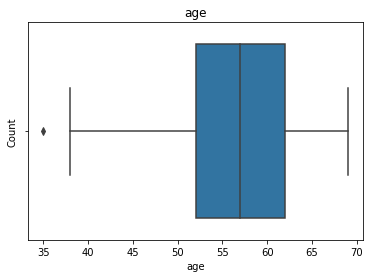

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


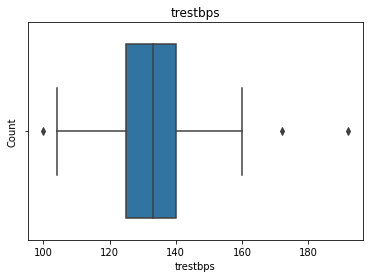

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


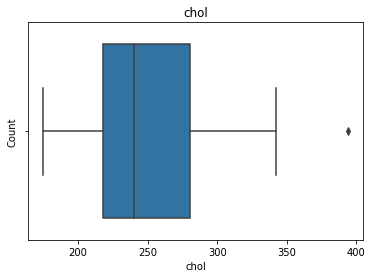

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


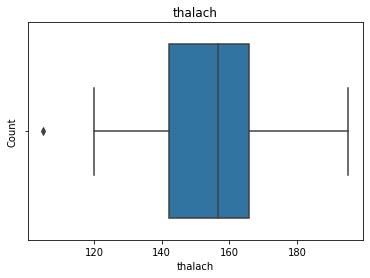

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


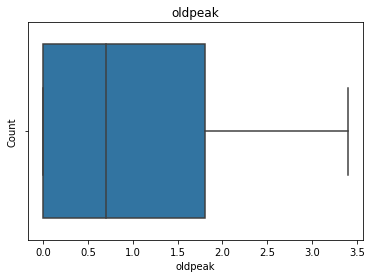

In [80]:
############### Continous Nuerical Features ################################
for feature in continuos_cols1:
    data=test_data.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

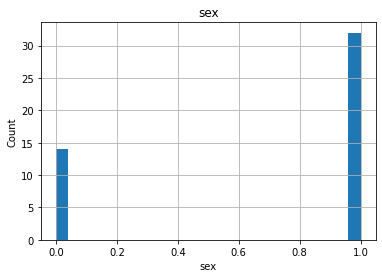

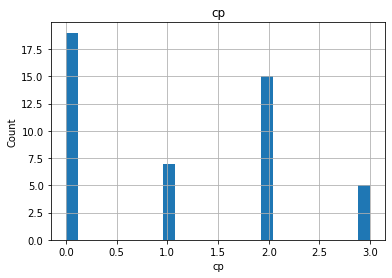

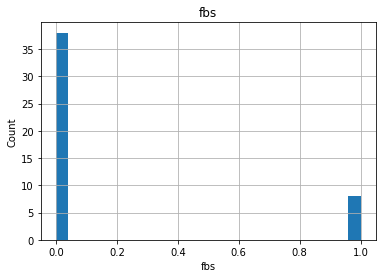

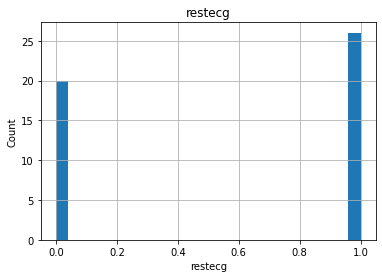

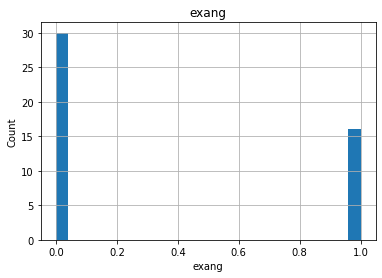

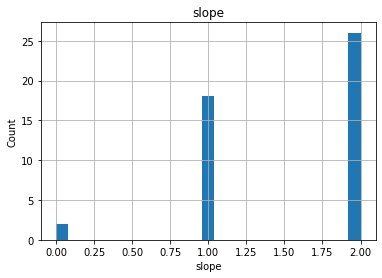

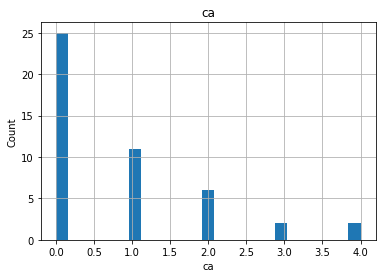

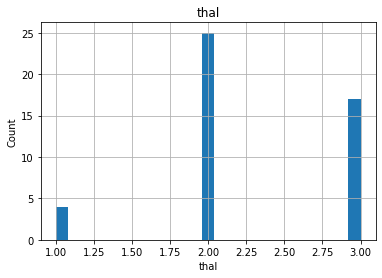

In [81]:
############### Discete Features ################################
for feature in discrete_cols1:
    data=test_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

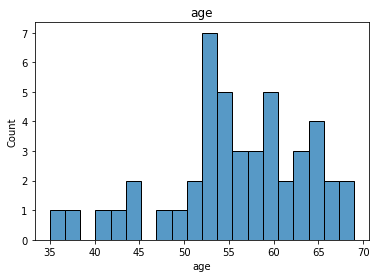

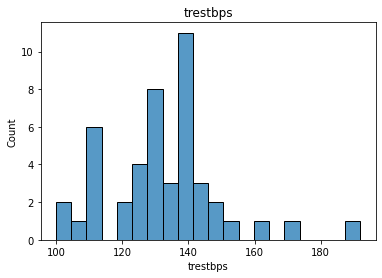

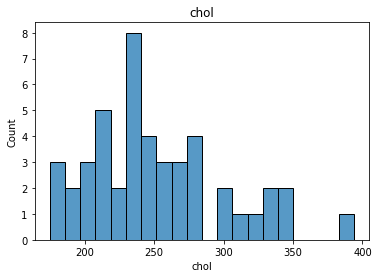

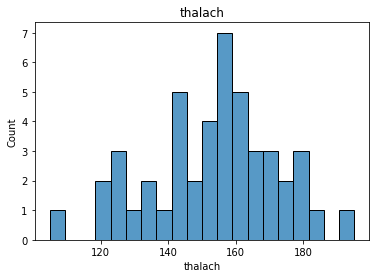

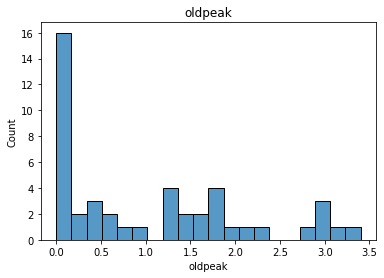

In [86]:
##################### outlier removal#################################
for feature in continuos_cols1:
    data=test_data.copy()
    sns.histplot(data[feature],bins=20)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [90]:
############ trestbps ############# --normally distributed
lower_boundry = test_data['age'].mean() - 1.5*test_data['age'].std()
upper_boundry = test_data['age'].mean() + 1.5*test_data['age'].std()
print(lower_boundry),print(upper_boundry)

43.945972343669126
67.48881026502653


(None, None)

In [88]:
test_data['age'].describe()

count    46.000000
mean     55.717391
std       7.847613
min      35.000000
25%      52.000000
50%      57.000000
75%      62.000000
max      69.000000
Name: age, dtype: float64

In [92]:
test_data.loc[test_data['age'] < 43,'age']  = 43

In [93]:
############ trestbps ############# --normally distributed
lower_boundry = test_data['thalach'].mean() - 1.5*test_data['thalach'].std()
upper_boundry = test_data['thalach'].mean() + 1.5*test_data['thalach'].std()
print(lower_boundry),print(upper_boundry)

124.67074769675564
181.67707839020085


(None, None)

In [94]:
test_data.loc[test_data['thalach'] < 124,'thalach']  = 124

In [97]:
############ trestbps ############# --normally distributed
lower_boundry = test_data['chol'].mean() - 1.5*test_data['chol'].std()
upper_boundry = test_data['chol'].mean() + 1.5*test_data['chol'].std()
print(lower_boundry),print(upper_boundry)

176.64130545972083
325.4021728011487


(None, None)

In [98]:
test_data.loc[test_data['chol'] > 325,'chol']  = 325

In [105]:
############ trestbps ############# --normally distributed
lower_boundry = test_data['trestbps'].mean() - 1.5*test_data['trestbps'].std()
upper_boundry = test_data['trestbps'].mean() + 1.5*test_data['trestbps'].std()
print(lower_boundry),print(upper_boundry)

107.30520074092155
157.78175578081758


(None, None)

In [106]:
test_data.loc[test_data['trestbps'] > 157,'trestbps']  = 157
test_data.loc[test_data['trestbps'] < 107,'trestbps']  = 107

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


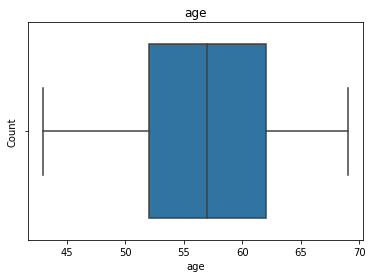

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


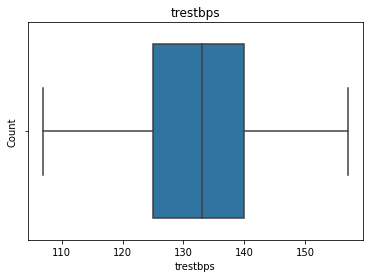

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


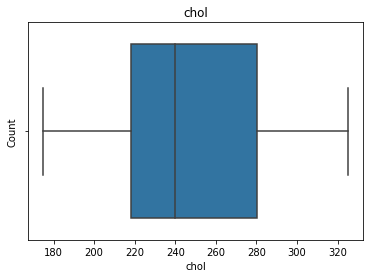

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


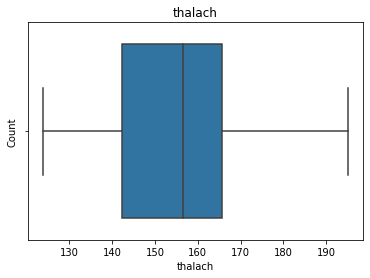

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


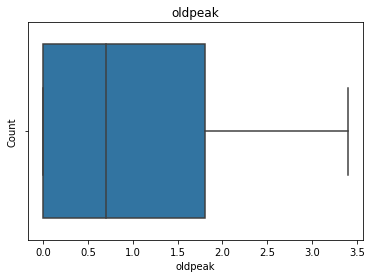

In [107]:
############### Continous Nuerical Features ################################
for feature in continuos_cols1:
    data=test_data.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [108]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,112,230,0,1,160,0,0.0,2,1,2
1,43,1,0,126,282,0,0,156,1,0.0,2,0,3
2,54,1,1,157,283,0,0,195,0,0.0,2,1,3
3,54,1,0,140,239,0,1,160,0,1.2,2,0,2
4,66,1,1,157,246,0,1,124,1,0.0,1,3,1


In [109]:
test_data['trestbps'].describe()

count     46.000000
mean     131.782609
std       14.126277
min      107.000000
25%      125.000000
50%      133.000000
75%      140.000000
max      157.000000
Name: trestbps, dtype: float64

In [110]:
X_test_data_scaled = sm.transform(test_data)


In [111]:
X_test_data_scaled

array([[-0.26787127,  0.69234301, -0.92811503, -1.21194596, -0.29512315,
        -0.40291148,  0.91991636,  0.48604082, -0.67474777, -0.93103787,
         1.03104357,  0.30276936, -0.57006   ],
       [-1.21216144,  0.69234301, -0.92811503, -0.30776716,  0.90078729,
        -0.40291148, -1.04038159,  0.30161833,  1.48203528, -0.93103787,
         1.03104357, -0.700855  ,  1.130619  ],
       [-0.05802901,  0.69234301,  0.04342059,  1.69434303,  0.92378557,
        -0.40291148, -1.04038159,  2.09973754, -0.67474777, -0.93103787,
         1.03104357,  0.30276936,  1.130619  ],
       [-0.05802901,  0.69234301, -0.92811503,  0.59641163, -0.08813865,
        -0.40291148,  0.91991636,  0.48604082, -0.67474777,  0.19059384,
         1.03104357, -0.700855  , -0.57006   ],
       [ 1.20102456,  0.69234301,  0.04342059,  1.69434303,  0.07284929,
        -0.40291148,  0.91991636, -1.17376153,  1.48203528, -0.93103787,
        -0.61678499,  2.31001809, -2.27073901],
       [-1.10724031,  0.692343

In [112]:
data22 = pd.DataFrame(X_test_data_scaled,columns=test_data.columns)

In [113]:
data22.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.267871,0.692343,-0.928115,-1.211946,-0.295123,-0.402911,0.919916,0.486041,-0.674748,-0.931038,1.031044,0.302769,-0.570060
1,-1.212161,0.692343,-0.928115,-0.307767,0.900787,-0.402911,-1.040382,0.301618,1.482035,-0.931038,1.031044,-0.700855,1.130619
2,-0.058029,0.692343,0.043421,1.694343,0.923786,-0.402911,-1.040382,2.099738,-0.674748,-0.931038,1.031044,0.302769,1.130619
3,-0.058029,0.692343,-0.928115,0.596412,-0.088139,-0.402911,0.919916,0.486041,-0.674748,0.190594,1.031044,-0.700855,-0.570060
4,1.201025,0.692343,0.043421,1.694343,0.072849,-0.402911,0.919916,-1.173762,1.482035,-0.931038,-0.616785,2.310018,-2.270739


In [114]:
y_pred_dt_test_data = ex_decision.predict(data22)

In [115]:
y_pred_dt_test_data

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1], dtype=int64)

In [116]:
sample.head()

,Id,disease
0,0,1
1,1,1
2,2,0
3,3,0
4,4,1


In [117]:
sample.shape

(46, 2)

In [118]:
y_pred_dt_test_data.shape

(46,)

In [119]:
sample_submit = sample.copy()

In [121]:
sample_submit = pd.DataFrame({'disease':y_pred_dt_test_data})

In [122]:
sample_submit.head()

,disease
0,0
1,1
2,1
3,1
4,0


In [123]:
sample_submit.to_csv('test_data_analysis.csv')